<a href="https://colab.research.google.com/github/Grandediw/MachineLearning/blob/main/S%26P500Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
32/32 [==============================] - 0s 1ms/step


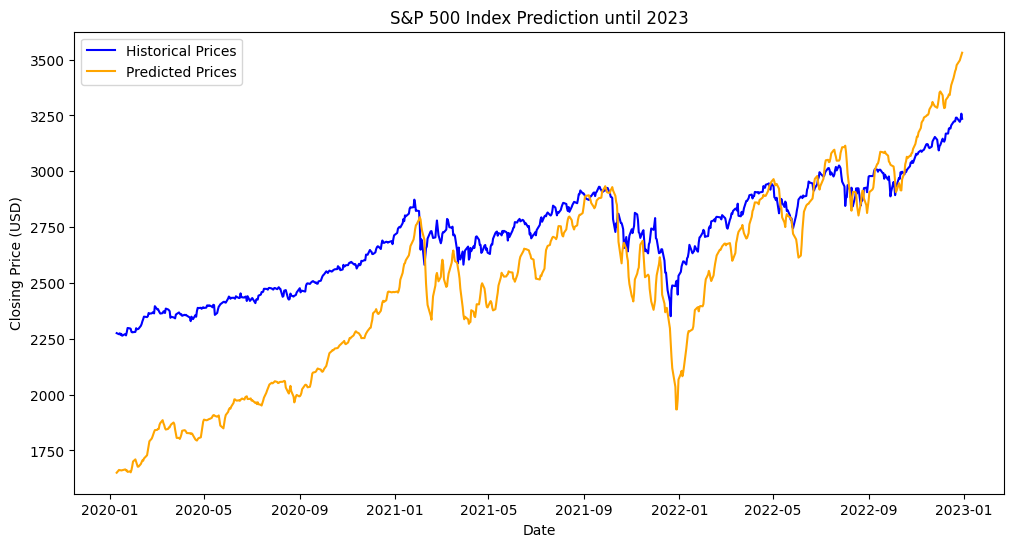

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import yfinance as yf

# Define the start date and end date
start_date = "2017-01-01"
end_date_extended = "2021-01-01"

# Load historical S&P 500 data
try:
    data_extended = yf.download('^GSPC', start=start_date, end=end_date_extended)['Close'].to_frame()
except Exception as e:
    print(f"Error loading data: {e}")

# Feature engineering: Creating lag features
data_extended['Close_Lag1'] = data_extended['Close'].shift(1)
data_extended['Close_Lag2'] = data_extended['Close'].shift(2)
data_extended['Close_Lag3'] = data_extended['Close'].shift(3)

# Drop NaN values resulting from lag features
data_extended = data_extended.dropna()

# Split the data into features (X) and target variable (y)
X_extended = data_extended[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']].values
y_extended = data_extended['Close'].values

# Normalize the features
scaler = MinMaxScaler()
X_extended_scaled = scaler.fit_transform(X_extended)

# Build a simple neural network model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model (you may need to adjust epochs and batch_size)
model.fit(X_extended_scaled, y_extended, epochs=150, batch_size=32, verbose=0)

# Make predictions for the next 2 years
y_pred_extended = model.predict(X_extended_scaled)

# Flatten the predictions if they are a 2D array
y_pred_extended_flat = y_pred_extended.flatten()

# Limit the plot until the year 2025
end_date_2025 = pd.Timestamp('2023-01-01')
common_index_2025 = common_index[common_index <= end_date_2025]
y_pred_extended_2025 = y_pred_extended_flat[:len(common_index_2025)]

# Visualize the predictions along with historical prices
plt.figure(figsize=(12, 6))
plt.plot(common_index_2025, data_extended['Close'].values[3:len(common_index_2025)+3], label='Historical Prices', color='blue')
plt.plot(common_index_2025, y_pred_extended_2025, label='Predicted Prices', color='orange')
plt.title('S&P 500 Index Prediction until 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
